In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

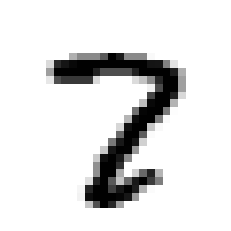

In [10]:
plt.imshow(X_train_full[12000],cmap='binary')
plt.axis('off')
plt.show()

<AxesSubplot:>

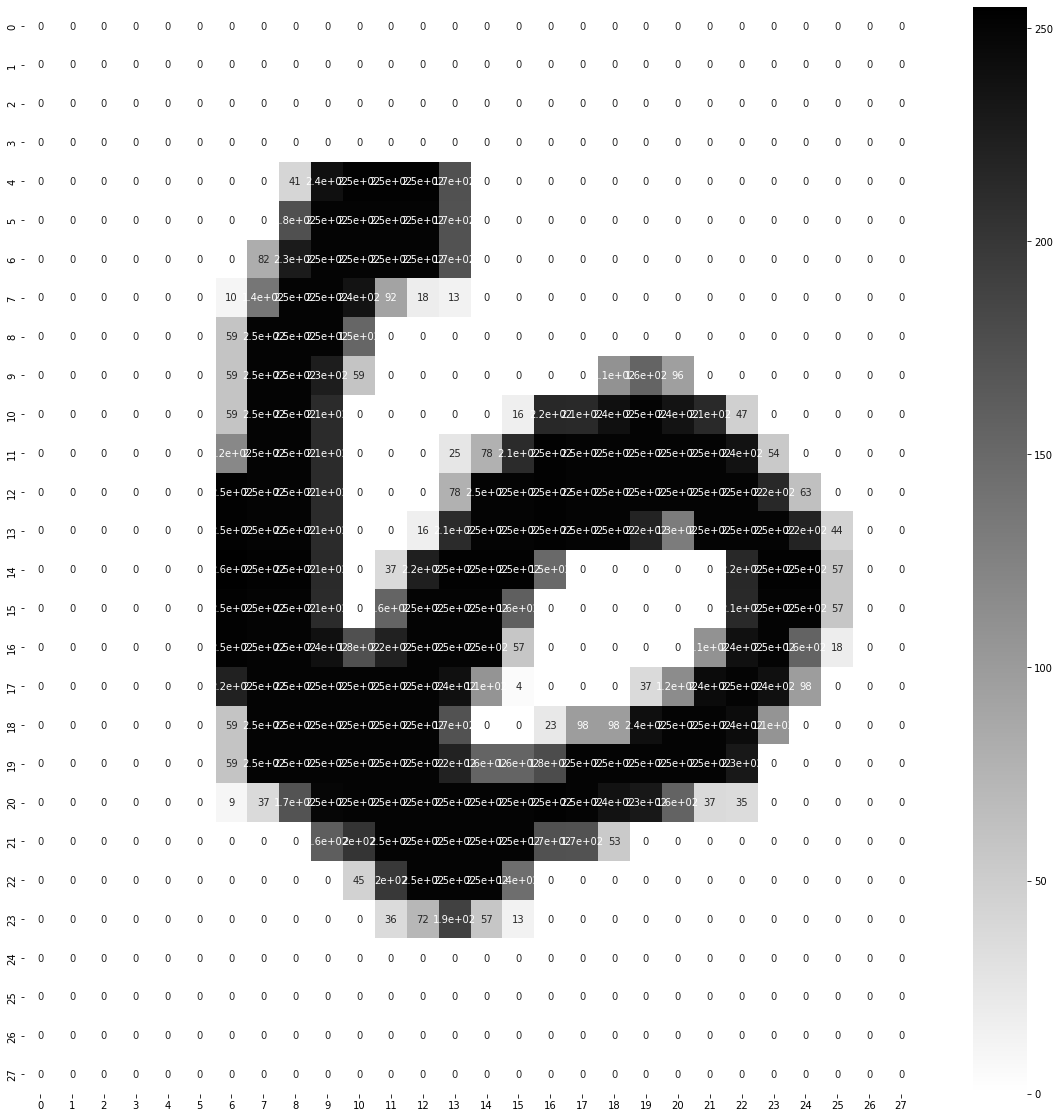

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [12]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
# scale the test set as well
X_test = X_test / 255.

In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<AxesSubplot:>

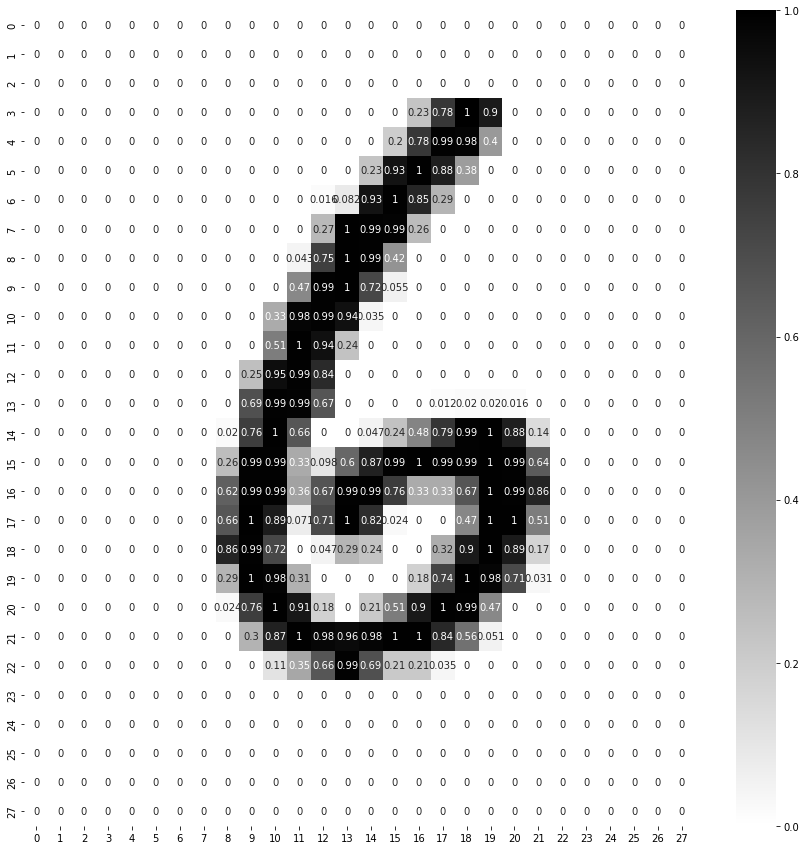

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [16]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [17]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

In [20]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [21]:
model_clf.layers[1].name

'hiddenlayer1'

In [22]:
hidden1=model_clf.layers[1]

In [23]:
# you can get the wrights of the layers
weights,biases=hidden1.get_weights()

In [24]:
weights

array([[-0.05665467, -0.00202705,  0.0442036 , ..., -0.04227544,
         0.02746622,  0.01020315],
       [ 0.04785646,  0.01064193, -0.00157496, ..., -0.06951439,
        -0.05212128, -0.06590672],
       [ 0.05906539, -0.02619672,  0.0037329 , ..., -0.02324351,
        -0.03059553,  0.04022168],
       ...,
       [-0.04450497, -0.0575119 ,  0.06406692, ..., -0.04260886,
        -0.05344895,  0.0126218 ],
       [-0.03642809,  0.07358514,  0.07431239, ...,  0.04683329,
        -0.05364528,  0.02559141],
       [-0.05440441,  0.05773316,  0.02691494, ..., -0.00696886,
        -0.03193839,  0.00807067]], dtype=float32)

In [25]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 3ms/step - loss: 0.2104 - accuracy: 0.9374 - val_loss: 0.1008 - val_accuracy: 0.9710
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9735 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0746 - val_accuracy: 0.9764
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0615 - val_accuracy: 0.9822
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0700 - val_accuracy: 0.9810


In [26]:
import time 
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [27]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_02_25_23_19_39_.h5


In [28]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.210382,0.937364,0.100778,0.9710
1,0.087190,0.973473,0.094507,0.9732
2,0.059778,0.981527,0.074601,0.9764
3,0.044008,0.985873,0.061514,0.9822
4,0.033293,0.988836,0.069959,0.9810


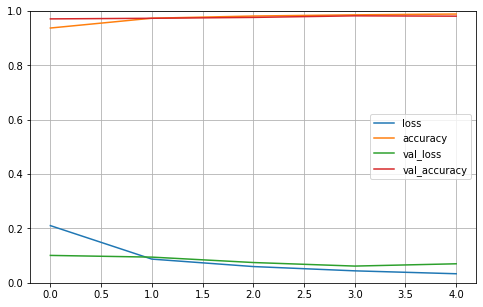

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9758


[0.08298734575510025, 0.9757999777793884]

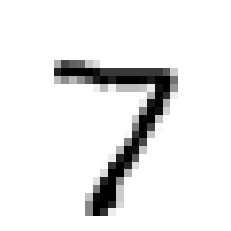

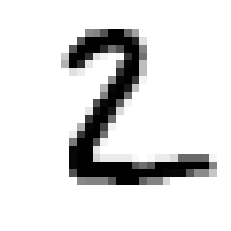

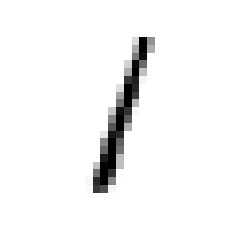

In [32]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()


In [33]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 82ms/step


In [34]:
prediction

array([[1.3372892e-09, 7.8156553e-08, 6.0507093e-09, 2.7738463e-07,
        2.1893347e-11, 5.0662812e-09, 3.5716447e-13, 9.9999964e-01,
        1.6333207e-08, 2.8809774e-08],
       [1.3945735e-10, 9.5790490e-08, 9.9999976e-01, 1.3323947e-07,
        1.8158142e-16, 2.0183367e-12, 1.2106734e-12, 1.8934758e-11,
        6.3355889e-09, 1.7507393e-17],
       [2.1492493e-08, 9.9988294e-01, 2.5900147e-07, 2.3966444e-09,
        2.5639815e-07, 4.0400570e-07, 1.4901300e-05, 9.8269556e-05,
        2.9126916e-06, 7.9266833e-09]], dtype=float32)

In [35]:
y_prob=prediction[0]

In [36]:
np.argmax(y_prob.round(5))

7

In [37]:
y_prob=prediction[1]

In [38]:
np.argmax(y_prob)

2

In [39]:
model_clf.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[1.3372892e-09, 7.8156404e-08, 6.0507208e-09, ..., 9.9999964e-01,
        1.6333207e-08, 2.8809774e-08],
       [1.3945735e-10, 9.5790490e-08, 9.9999976e-01, ..., 1.8934758e-11,
        6.3355889e-09, 1.7507393e-17],
       [2.1492493e-08, 9.9988294e-01, 2.5900195e-07, ..., 9.8269556e-05,
        2.9126916e-06, 7.9266984e-09],
       ...,
       [2.4716144e-11, 1.8763375e-09, 7.8808038e-13, ..., 6.7479256e-08,
        4.4477174e-06, 6.3201810e-07],
       [1.6405027e-11, 7.3000498e-14, 9.6779592e-16, ..., 9.8461524e-11,
        1.5783456e-07, 3.8246135e-11],
       [1.7755321e-12, 3.5633073e-11, 8.1595174e-13, ..., 5.0109649e-17,
        1.4661517e-11, 8.9063814e-14]], dtype=float32)

In [42]:
import tensorflow as tf
from tf.keras.models import load_model
model=load_model("/content/SAVED_MODELS/Model_2023_02_25_23_19_39_.h5")

ModuleNotFoundError: ignored